In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

input_data = pd.read_csv("../sample/2023_smartFarm_AI_hackathon_dataset.csv")
# input_data = input_data.drop(columns=['frmDist'])

import warnings
warnings.filterwarnings('ignore')


In [45]:
input_data['frmDist'].value_counts()

frmDist
DBSF4720    371
DBSF1886    371
DBSF8205    371
DBSF6318    371
DBSF1673    371
           ... 
DBSF3001     72
DBSF2992     72
DBSF6914     72
DBSF6949     72
DBSF1059     72
Name: count, Length: 360, dtype: int64

In [21]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84840 entries, 0 to 84839
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       84840 non-null  int64  
 1   inTp                       84840 non-null  float64
 2   inHd                       84840 non-null  float64
 3   otmsuplyqy                 84840 non-null  float64
 4   acSlrdQy                   84840 non-null  float64
 5   cunt                       84840 non-null  float64
 6   ph                         84840 non-null  float64
 7   outTp                      84840 non-null  float64
 8   outWs                      84840 non-null  float64
 9   daysuplyqy                 84840 non-null  float64
 10  inCo2                      84840 non-null  float64
 11  ec                         84840 non-null  float64
 12  frmYear                    84840 non-null  int64  
 13  frmWeek                    84840 non-null  int

In [22]:
# 1. 기본 통계 정보 확인
stats_info = input_data.describe()
stats_info

,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,daysuplyqy,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
count,8.484000e+04,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.0,...,84840.000000,84840.00000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,8.484000e+04
mean,2.018306e+07,16.741165,69.840334,63.771906,859.358175,11.050016,4.329564,8.919073,0.507100,0.0,...,24128.137397,154.82117,23.223176,381.415436,480.583450,13.142900,7.754311,10.462087,122.197176,1.369699e+05
std,1.415661e+04,7.844482,30.632917,50.989079,863.627104,13.169075,2.360309,9.562816,0.736510,0.0,...,38713.785840,514.61495,77.192242,1265.736256,1594.827682,227.353742,134.138708,59.149613,690.867475,5.413194e+05
min,2.017071e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.832372,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.017121e+07,15.181276,67.966019,0.000000,0.000000,1.663457,4.428794,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.018041e+07,18.164113,78.384204,67.951238,762.690836,7.087341,5.208487,7.014140,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2.018120e+07,21.158215,88.724599,91.599089,1477.986231,15.514866,5.917302,17.122196,0.862444,0.0,...,40064.347955,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,2.022121e+07,39.221978,119.051100,335.648934,4422.127255,100.947446,8.126081,36.776236,6.497037,0.0,...,253678.264188,5388.27699,808.241549,10440.000887,13154.401118,8387.322508,4948.520280,838.686300,9795.855985,4.031464e+06


1. 일부 컬럼들은 중앙값이 0이며, 최대값이 큰 값으로 나타나는 특징이 있습니다. 이는 아마도 특정 기간 동안 활동이 없다가 활동이 시작되는 패턴을 나타내는 것 같습니다.
2. date 컬럼의 최소값은 20170701이며, 최대값은 20221231입니다. 이는 데이터가 2017년 7월 1일부터 2022년 12월 31일까지의 기간을 포함하고 있음을 나타냅니다.
3. outtrn_cumsum와 HeatingEnergyUsage_cumsum 컬럼은 누적값으로 보여집니다.

In [34]:
# 2. 결측치 확인
missing_data = input_data.isnull().sum()
missing_data

date                         0
inTp                         0
inHd                         0
otmsuplyqy                   0
acSlrdQy                     0
cunt                         0
ph                           0
outTp                        0
outWs                        0
daysuplyqy                   0
inCo2                        0
ec                           0
frmYear                      0
frmWeek                      0
frtstGrupp                   0
lefstalklt                   0
frtstSetCo                   0
pllnLt                       0
flanGrupp                    0
frtstCo                      0
flanJnt                      0
tcdmt                        0
frmhsFclu                    0
hvstGrupp                    0
hvstJnt                      0
grwtLt                       0
fcluHg                       0
lefLt                        0
flwrCo                       0
hvstCo                       0
lefCunt                      0
frtstJnt                     0
lefBt   

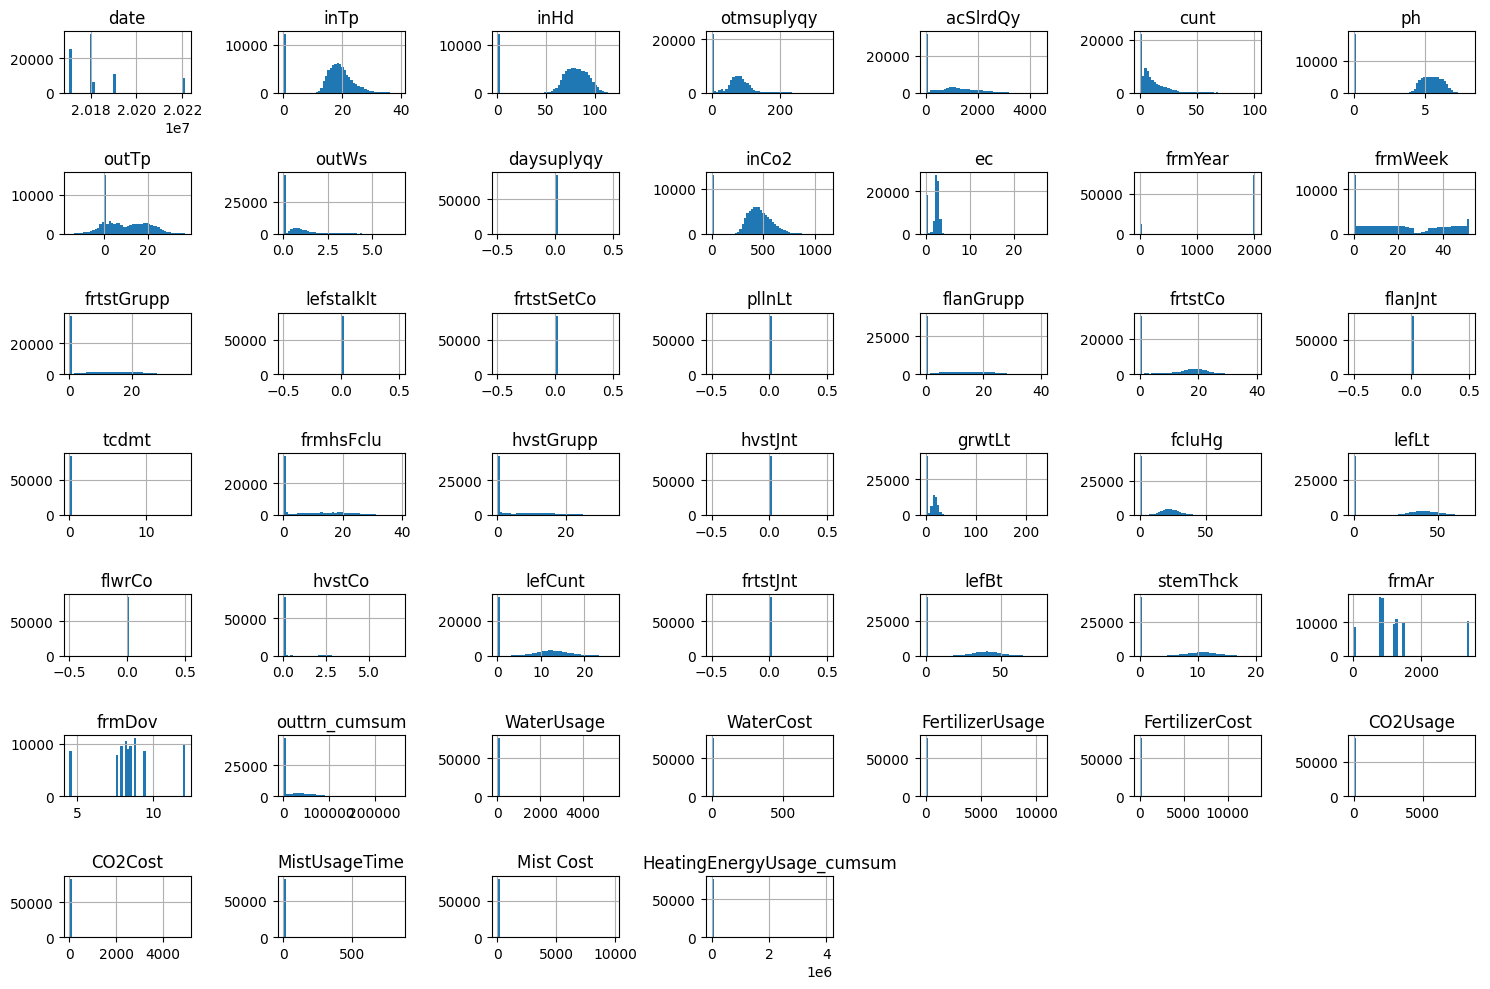

In [28]:
# 3. 데이터 분포 확인
plt.figure(figsize=(15, 10))
input_data.hist(ax=plt.gca(), bins=50)
plt.tight_layout()
plt.show()

In [12]:
# 4. 주요 특성 간의 상관 관계 분석
correlation_matrix = input_data.corr()

In [13]:
# 상관계수가 높은 순서로 정렬
sorted_corr = correlation_matrix['outtrn_cumsum'].sort_values(ascending=False)

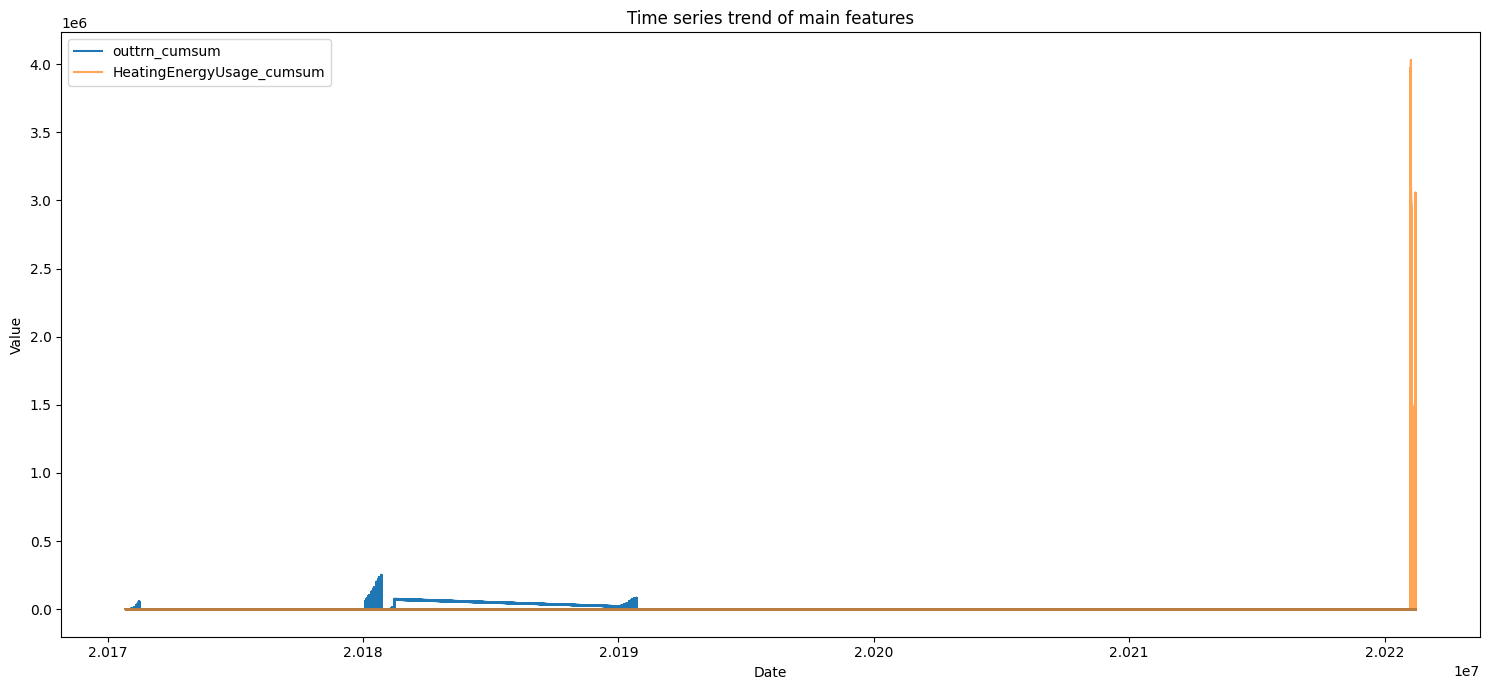

In [14]:
# 5. 주요 특성의 시계열 트렌드 확인
# 날짜와 주요 특성에 대한 시계열 그래프 생성
plt.figure(figsize=(15, 7))
plt.plot(input_data['date'], input_data['outtrn_cumsum'], label='outtrn_cumsum')
plt.plot(input_data['date'], input_data['HeatingEnergyUsage_cumsum'], label='HeatingEnergyUsage_cumsum', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Time series trend of main features')
plt.tight_layout()
plt.show()

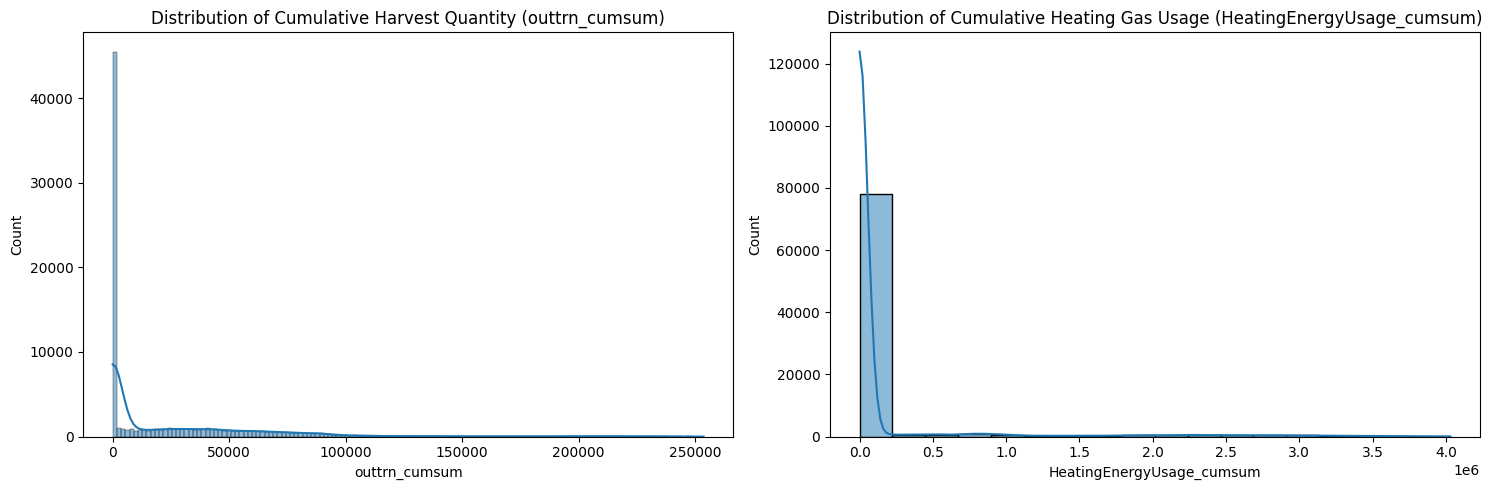

In [29]:

# 타겟 변수 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(input_data['outtrn_cumsum'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Cumulative Harvest Quantity (outtrn_cumsum)')

sns.histplot(input_data['HeatingEnergyUsage_cumsum'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of Cumulative Heating Gas Usage (HeatingEnergyUsage_cumsum)')

plt.tight_layout()
plt.show()


1. outtrn_cumsum (누적 수확량)은 중간 값 주변에 데이터가 집중되어 있으며, 약간의 왼쪽으로 치우친 분포를 보입니다.
2. HeatingEnergyUsage_cumsum (난방용 도시가스 누적 사용량)은 좌측에 데이터가 집중되어 있어 왼쪽으로 크게 치우친 분포를 보입니다.

In [16]:
stats_info

,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,daysuplyqy,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
count,8.484000e+04,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.0,...,84840.000000,84840.00000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,84840.000000,8.484000e+04
mean,2.018306e+07,16.741165,69.840334,63.771906,859.358175,11.050016,4.329564,8.919073,0.507100,0.0,...,24128.137397,154.82117,23.223176,381.415436,480.583450,13.142900,7.754311,10.462087,122.197176,1.369699e+05
std,1.415661e+04,7.844482,30.632917,50.989079,863.627104,13.169075,2.360309,9.562816,0.736510,0.0,...,38713.785840,514.61495,77.192242,1265.736256,1594.827682,227.353742,134.138708,59.149613,690.867475,5.413194e+05
min,2.017071e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.832372,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.017121e+07,15.181276,67.966019,0.000000,0.000000,1.663457,4.428794,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.018041e+07,18.164113,78.384204,67.951238,762.690836,7.087341,5.208487,7.014140,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2.018120e+07,21.158215,88.724599,91.599089,1477.986231,15.514866,5.917302,17.122196,0.862444,0.0,...,40064.347955,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,2.022121e+07,39.221978,119.051100,335.648934,4422.127255,100.947446,8.126081,36.776236,6.497037,0.0,...,253678.264188,5388.27699,808.241549,10440.000887,13154.401118,8387.322508,4948.520280,838.686300,9795.855985,4.031464e+06


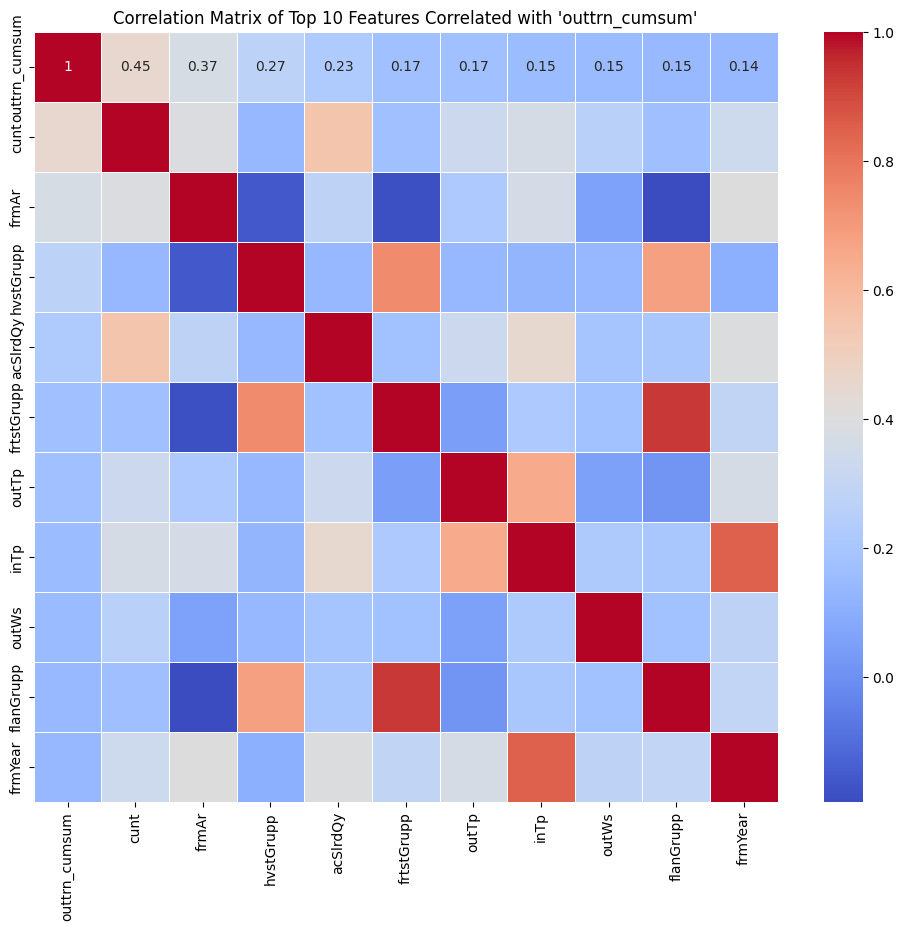

In [33]:
# 전체 특성과 타겟 변수와의 상관관계 계산
correlation_with_target = input_data.corrwith(input_data['outtrn_cumsum']).sort_values(ascending=False)

# 상위 10개 특성 출력
top_correlated_features = correlation_with_target.head(11).index.tolist()  # 상위 10개 + 타겟 변수 포함

# 타겟 변수 포함한 상위 10개 특성의 상관관계 행렬 계산
top_correlation_matrix = input_data[top_correlated_features].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Top 10 Features Correlated with 'outtrn_cumsum'")
plt.show()


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Loading the dataset
data = pd.read_csv("../sample/2023_smartFarm_AI_hackathon_dataset.csv")

# Checking columns with only 0 values
columns_with_only_zeros = data.columns[data.eq(0).all()].tolist()
columns_with_only_zeros


['daysuplyqy',
 'lefstalklt',
 'frtstSetCo',
 'pllnLt',
 'flanJnt',
 'hvstJnt',
 'flwrCo',
 'frtstJnt']

In [2]:
data = data.drop(columns=columns_with_only_zeros)
data

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1347.554178,202.133127,4711.308821,5936.249114,0.000000,0.0000,190.168990,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,69.899353,10.484903,271.379890,341.938662,0.000000,0.0000,0.000000,0.000000,0.0
3,DBSF1059,20221003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,412.225065,61.833760,1539.505534,1939.776973,253.744916,149.7095,0.000000,0.000000,0.0
4,DBSF1059,20221004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,590.608634,88.591295,2614.973165,3294.866187,3032.885084,1789.4022,1.149739,13.428955,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84835,DBSF9969,20180710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235272.042536,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84836,DBSF9969,20180711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,227947.124946,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84837,DBSF9969,20180712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231527.426327,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
84838,DBSF9969,20180713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,251254.321635,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0


In [7]:
zone_mean = data.groupby('frmDist').mean()
zone_mean

,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,inCo2,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
frmDist,,,,,,,,,,,,,,,,,,,,,
DBSF1059,2.022108e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.414057,0.000000,0.000000,0.000000,...,7.188801,1208.143600,181.221540,3245.663239,4089.535681,198.485908,117.106686,306.476061,3579.640393,1.521553e+06
DBSF1093,2.022108e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.359668,0.000000,0.000000,0.000000,...,8.064980,1568.274114,235.241117,3624.189248,4566.478452,273.056188,161.103151,26.886185,314.030644,1.029719e+06
DBSF1121,2.022108e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.478840,0.000000,0.000000,0.000000,...,7.435677,1254.294394,188.144159,3342.226913,4211.205910,215.958412,127.415463,302.710901,3535.663324,1.427400e+06
DBSF1172,2.022108e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.498542,0.000000,0.000000,0.000000,...,7.226296,1236.226154,185.433923,3235.535287,4076.774461,196.039586,115.663356,315.195388,3681.482127,1.454946e+06
DBSF1180,2.022108e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.288172,0.000000,0.000000,0.000000,...,8.436315,1623.185737,243.477861,3578.167967,4508.491638,316.473956,186.719634,28.503537,332.921311,1.089163e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DBSF9922,2.018619e+07,18.556063,78.618986,102.310054,1214.383442,10.927132,5.238288,9.496529,1.172925,490.959388,...,17743.649849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DBSF9942,2.017694e+07,17.730452,79.149949,58.567463,1085.351211,13.263324,4.211305,7.045338,1.205296,471.877009,...,17730.618147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DBSF9948,2.022108e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.246349,0.000000,0.000000,0.000000,...,1.927759,1364.216451,204.632468,3510.102777,4422.729499,0.000000,0.000000,36.148898,422.219128,1.283172e+06


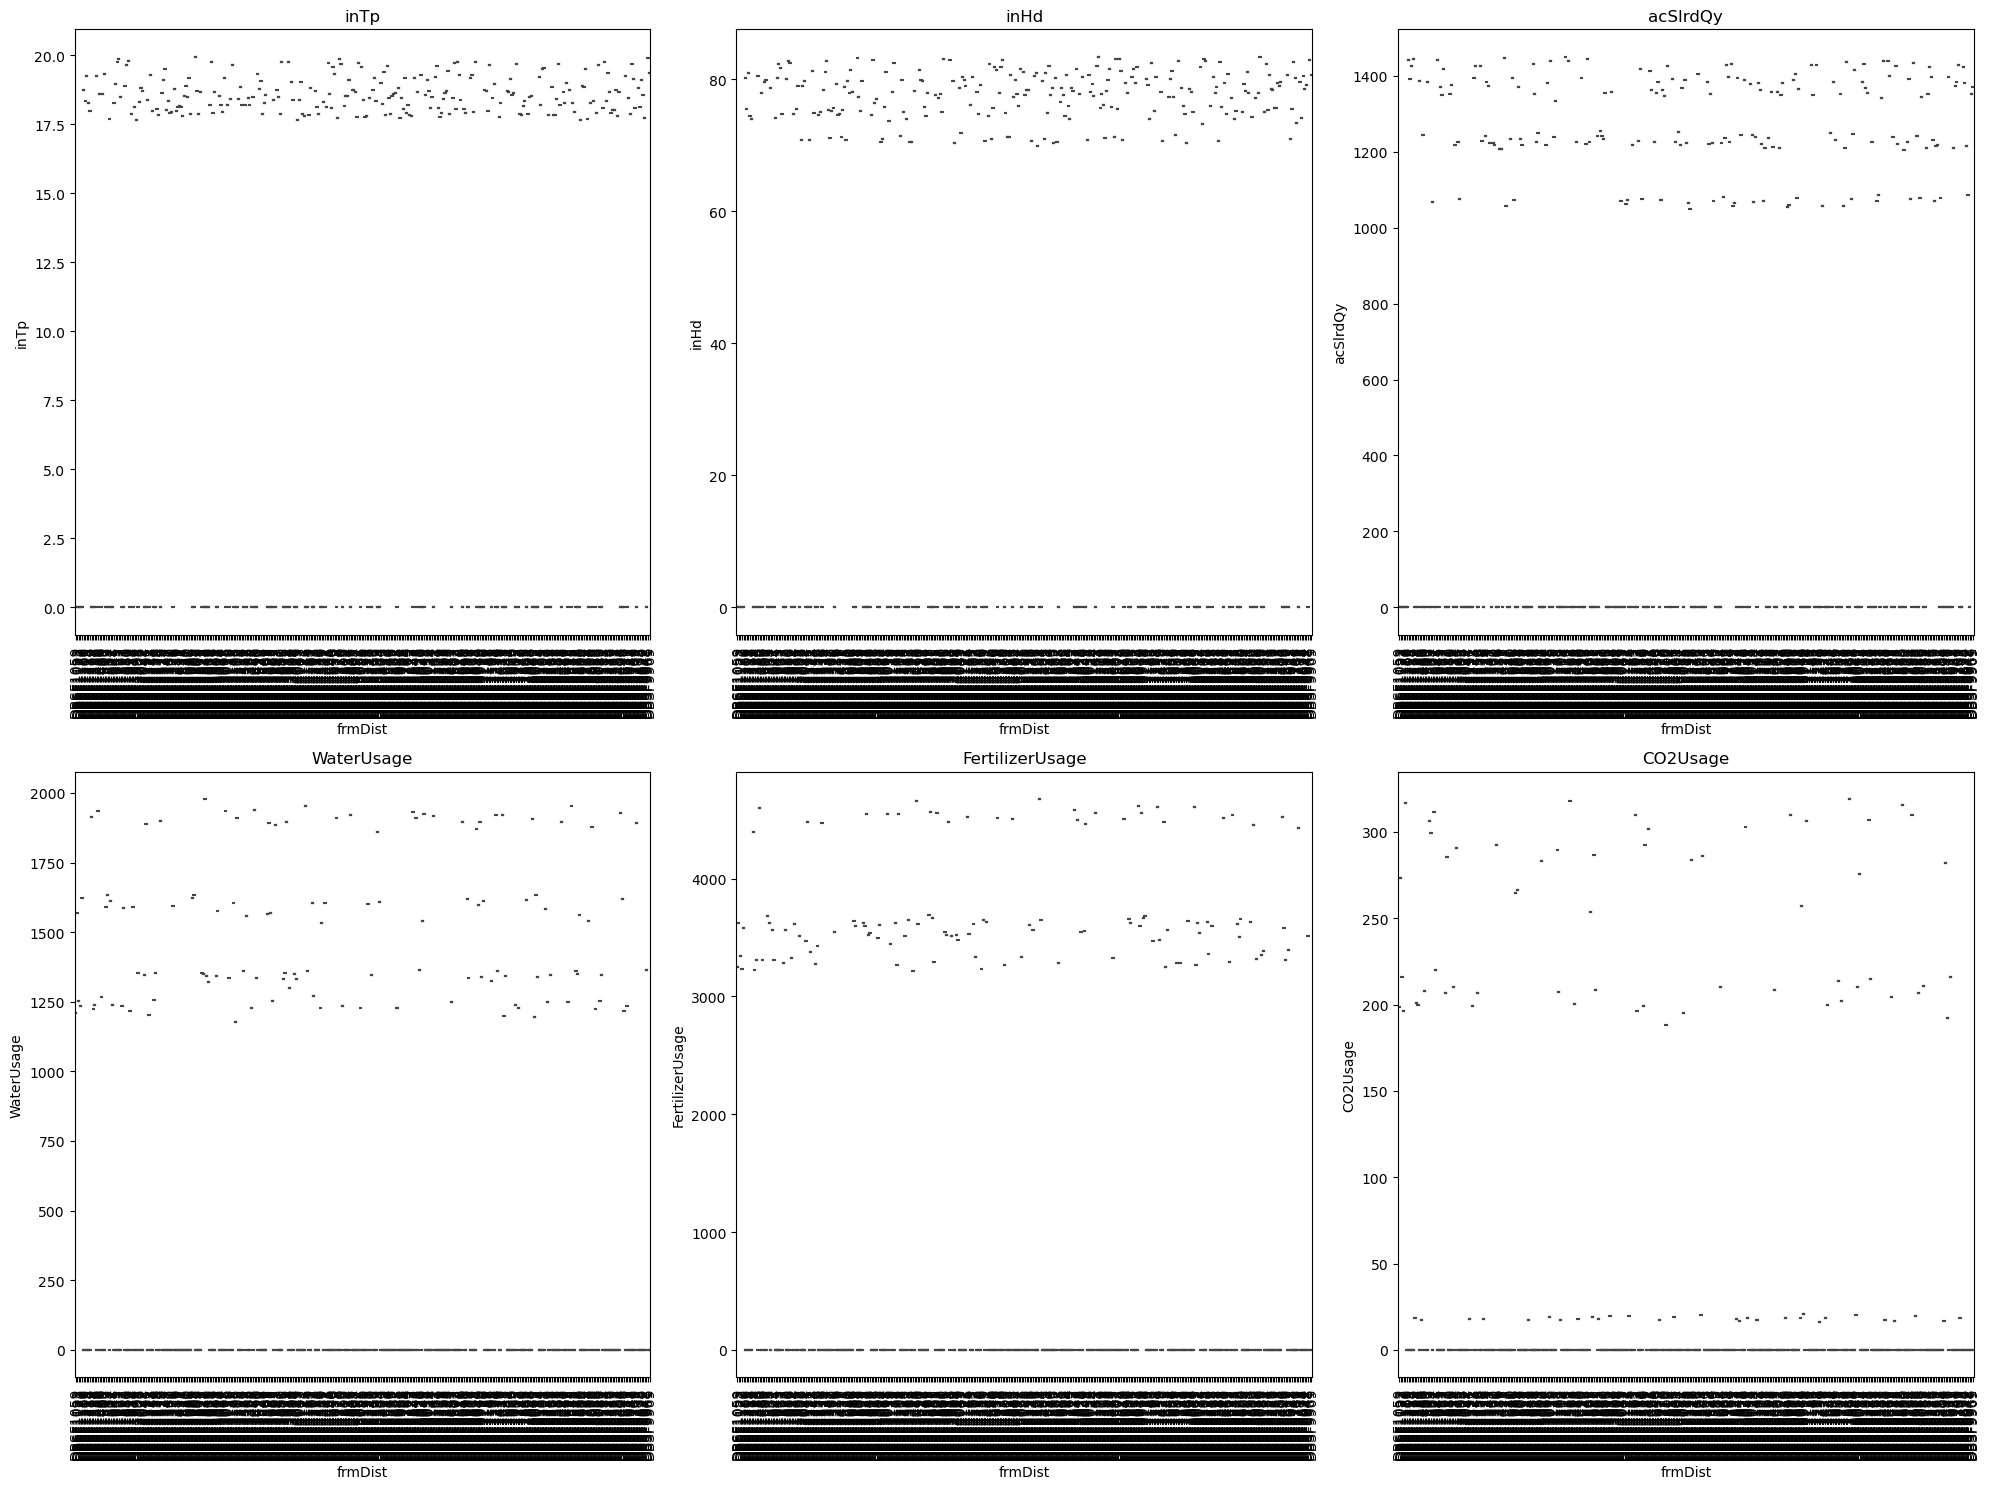

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to visualize
features_to_visualize = ['inTp', 'inHd', 'acSlrdQy', 'WaterUsage', 'FertilizerUsage', 'CO2Usage']

# Create boxplots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=zone_mean.index, y=zone_mean[feature])
    plt.title(feature)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


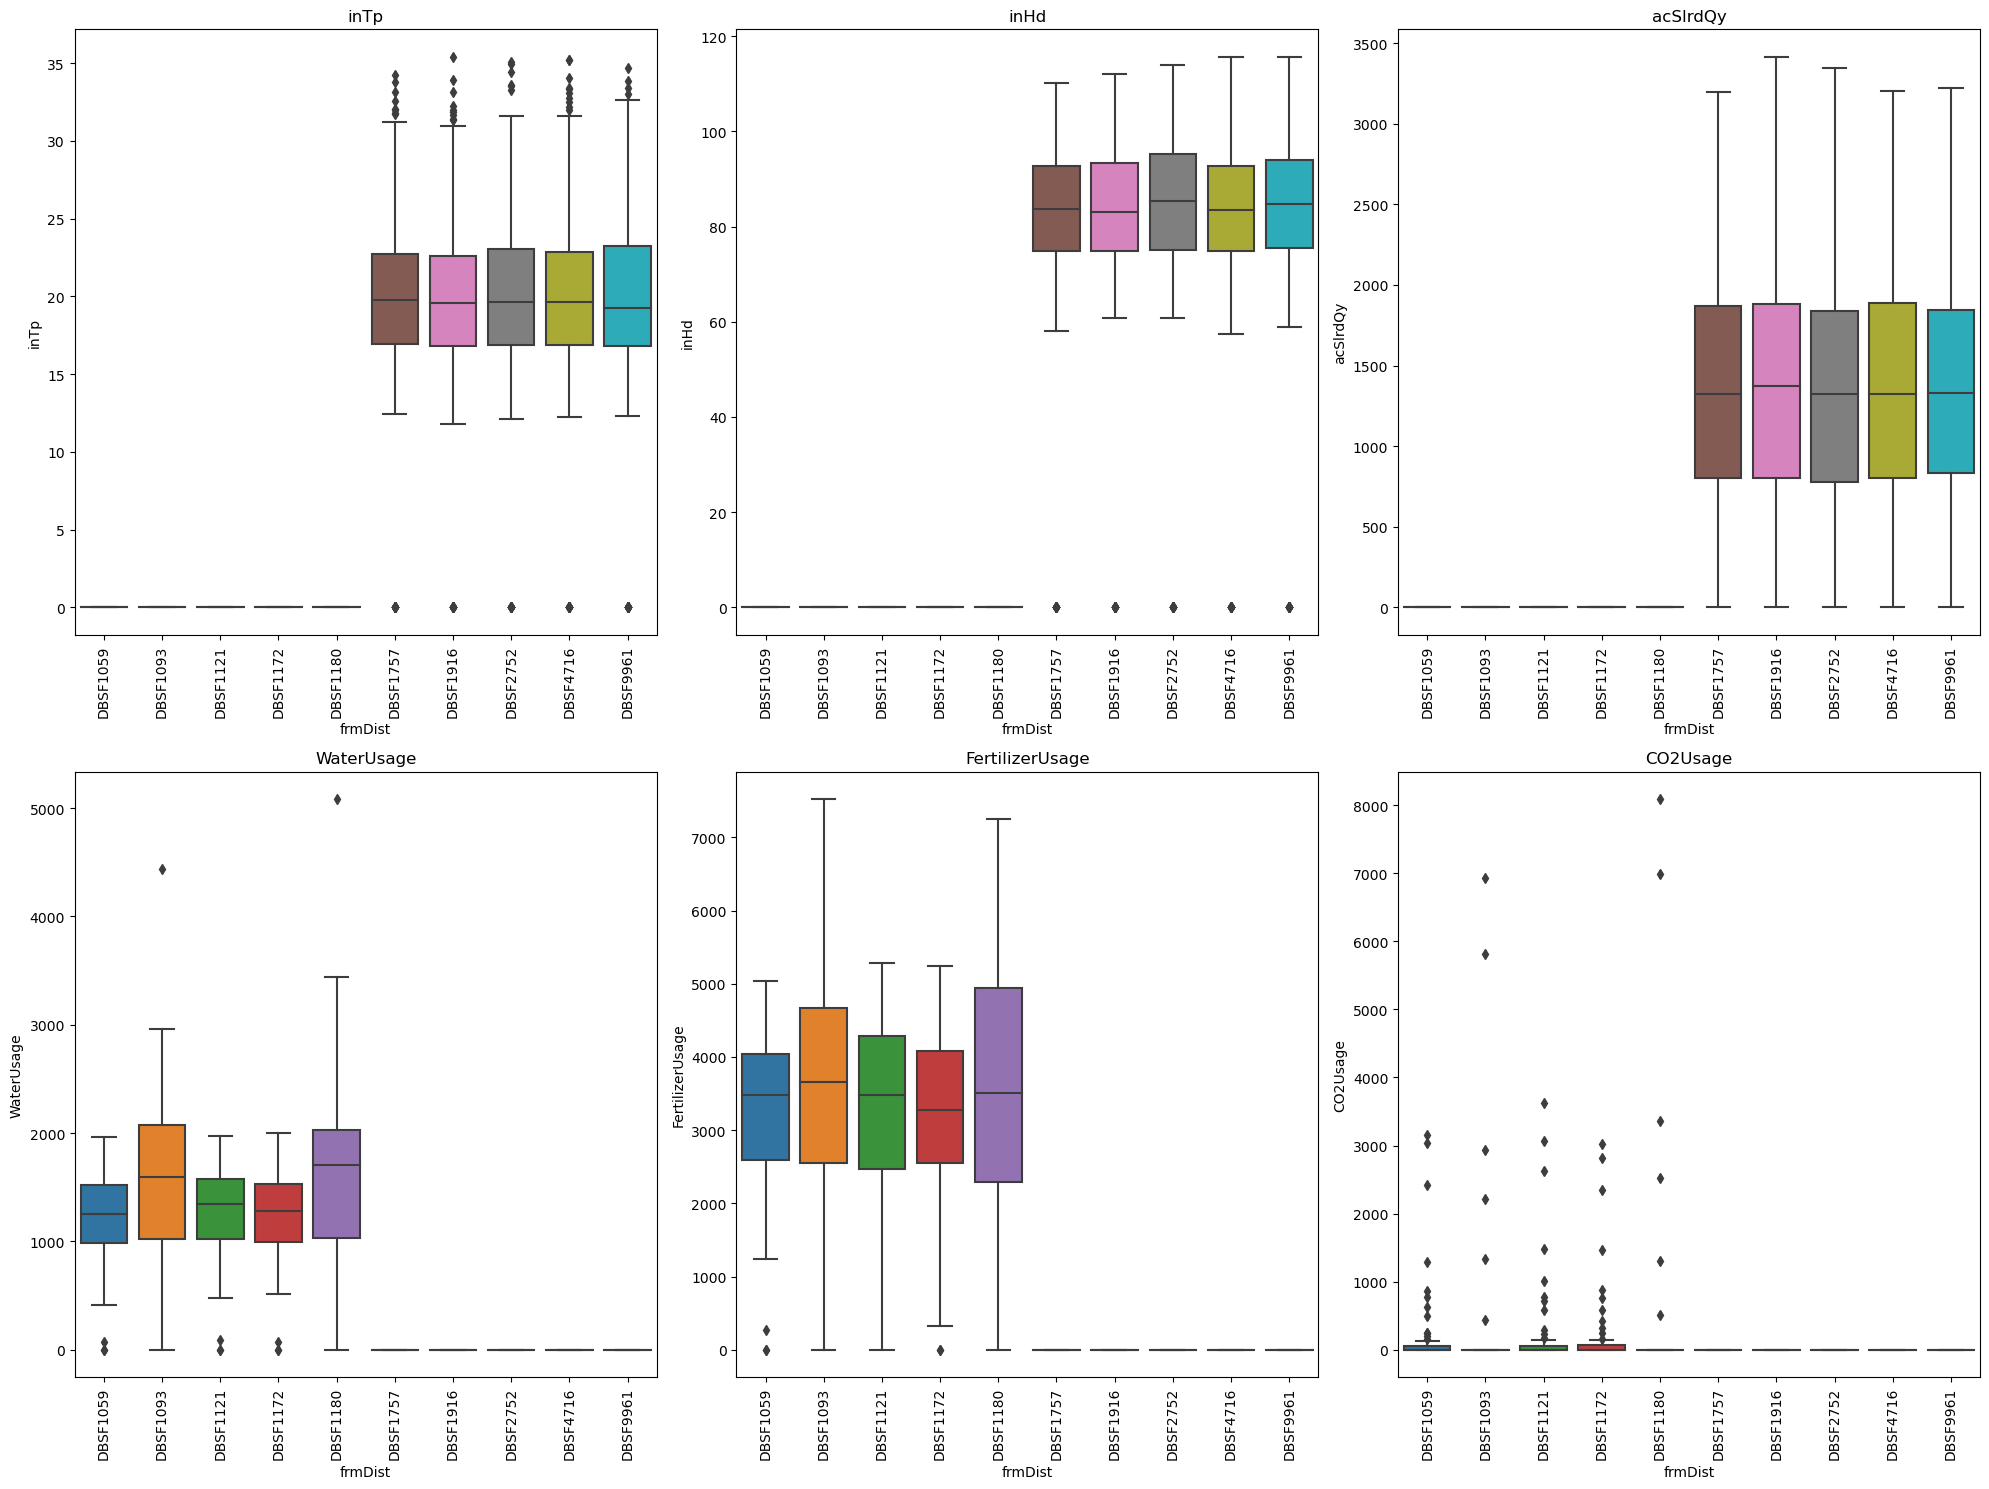

In [9]:
# Identify zones with highest, median, and lowest mean indoor temperatures
top_zones = zone_mean['inTp'].nlargest(5).index
bottom_zones = zone_mean['inTp'].nsmallest(5).index
median_zone = [zone_mean['inTp'].median()]

# Combine these zones
selected_zones = list(top_zones) + list(bottom_zones) + median_zone

# Filter the data for these selected zones
filtered_data = data[data['frmDist'].isin(selected_zones)]

# Now let's visualize the distribution of the features for these selected zones
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=filtered_data['frmDist'], y=filtered_data[feature])
    plt.title(feature)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [11]:
interpolated_data = data.copy()

for zone in interpolated_data['frmDist'].unique():
    mask = interpolated_data['frmDist'] == zone
    interpolated_data.loc[mask] = interpolated_data[mask].interpolate(method='linear', limit_direction='both')

# Check how many zeros are left after interpolation for each column
remaining_zeros = (interpolated_data == 0).sum()
remaining_zeros

frmDist                          0
date                             0
inTp                         12210
inHd                         12210
otmsuplyqy                   21750
acSlrdQy                     31770
cunt                         20280
ph                           18360
outTp                        12210
outWs                        46170
inCo2                        12210
ec                           18360
frmYear                      11580
frmWeek                      11580
frtstGrupp                   37380
flanGrupp                    38220
frtstCo                      33000
tcdmt                        83400
frmhsFclu                    36960
hvstGrupp                    41790
grwtLt                       40980
fcluHg                       42780
lefLt                        41730
hvstCo                       78750
lefCunt                      33330
lefBt                        41730
stemThck                     43050
frmAr                            0
frmDov              

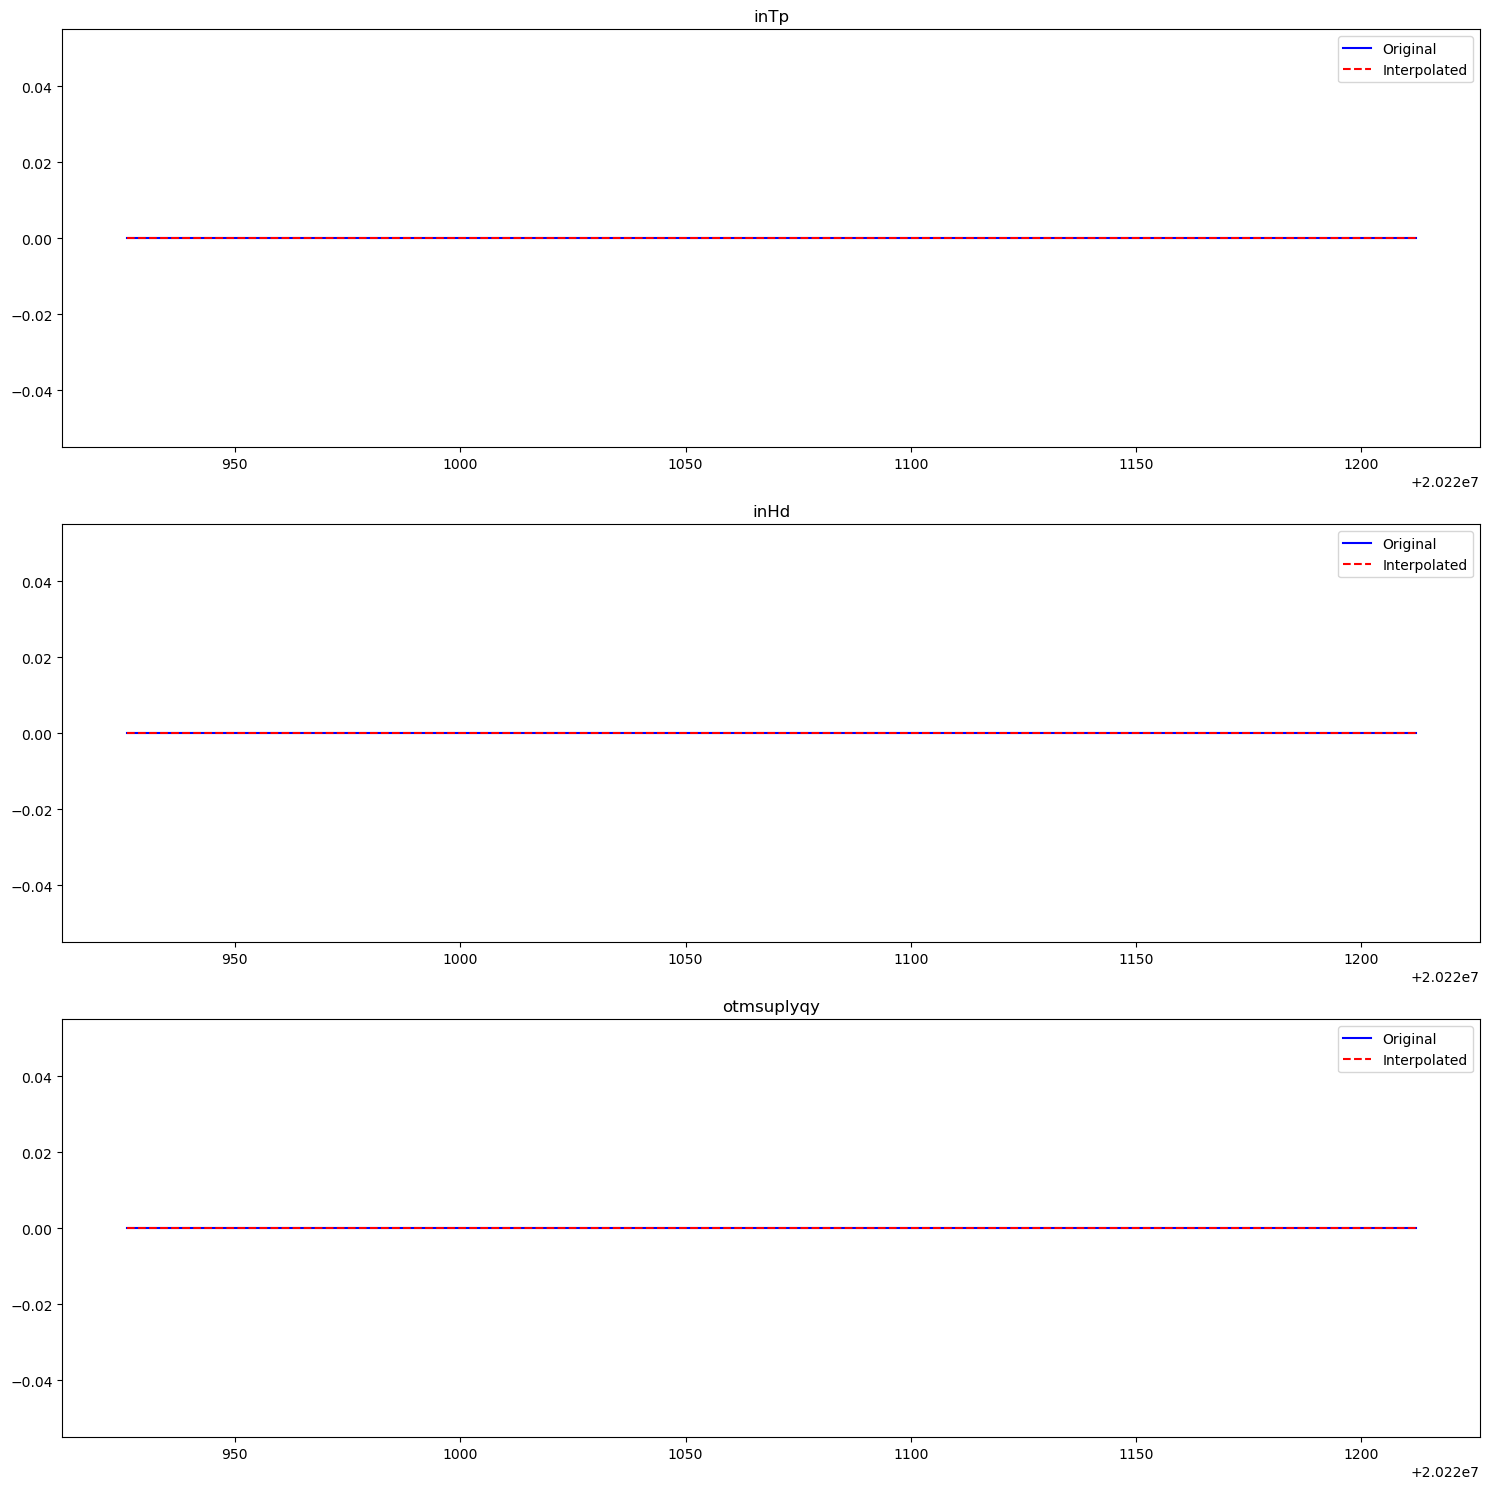

In [12]:
# Let's take a sample frmDist zone and plot before and after interpolation for a few columns
sample_zone = data['frmDist'].unique()[0]
sample_original = data[data['frmDist'] == sample_zone]
sample_interpolated = interpolated_data[interpolated_data['frmDist'] == sample_zone]

# Plotting for 'inTp', 'inHd', and 'otmsuplyqy'
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

columns_to_plot = ['inTp', 'inHd', 'otmsuplyqy']

for i, col in enumerate(columns_to_plot):
    axes[i].plot(sample_original['date'], sample_original[col], label='Original', color='blue')
    axes[i].plot(sample_interpolated['date'], sample_interpolated[col], label='Interpolated', color='red', linestyle='dashed')
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()